In [53]:
import math
import sympy
import random
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from matplotlib import pyplot as plt

from jupyterthemes import jtplot
jtplot.style(figsize=(13, 9), ticks=False)

# 破产理论

In [50]:
win_rate = 0.9
T=10000 # 试验次数
pos_rates = [i*0.001 for i in range(1000)]
def cal_rets(pos_rate):
    ret = 0
    for _ in range(T):
        x = random.random()
        if x <= win_rate:
            ret = ret + math.log(1+pos_rate) # 对数收益率，累计收益率 时序累加性
        else:
            ret = ret + math.log(1-pos_rate)
    return ret

results = list(map(cal_rets, pos_rates))

Text(0, 0.5, 'log_ret')

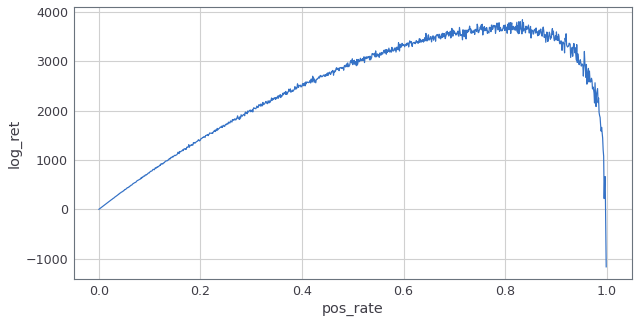

In [60]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(pos_rates, results)
ax.set_xlabel("pos_rate")
ax.set_ylabel("log_ret")

## 凯利公式
解决静态可重复的情况下仓位管理问题

In [57]:
f, b, p, q, b = sympy.symbols("f b p q b")
f = (b*p - q) / b
f

(b*p - q)/b

- f 每次押注仓位
- p 获胜的概率
- q 失败的概率
- b 赔率

In [59]:
f = (1*win_rate - (1-win_rate)) / 1
f

0.8

如果每次下注凯利公式建议的一半，将获得3/4的回报，而波动率只有一半。